In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_org = pd.read_csv('https://raw.githubusercontent.com/ashish-cell/BADM-211-FA21/main/Data/HR_Promote.csv')

In [3]:
df_org.shape

(54808, 14)

In [4]:
df_org.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df =df_org.columns.str.replace(' ','_')
aa = df_org[['KPIs_met >80%']]



In [6]:
df = df_org[['employee_id','department','region','education','gender','recruitment_channel','no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']]

In [7]:
y = df.is_promoted
X =df_org[['employee_id','department','region','education','gender','recruitment_channel','no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']]

In [8]:
X.shape

(54808, 13)

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [10]:
X.shape

(54808, 13)

Text(0.5, 0.98, 'test')

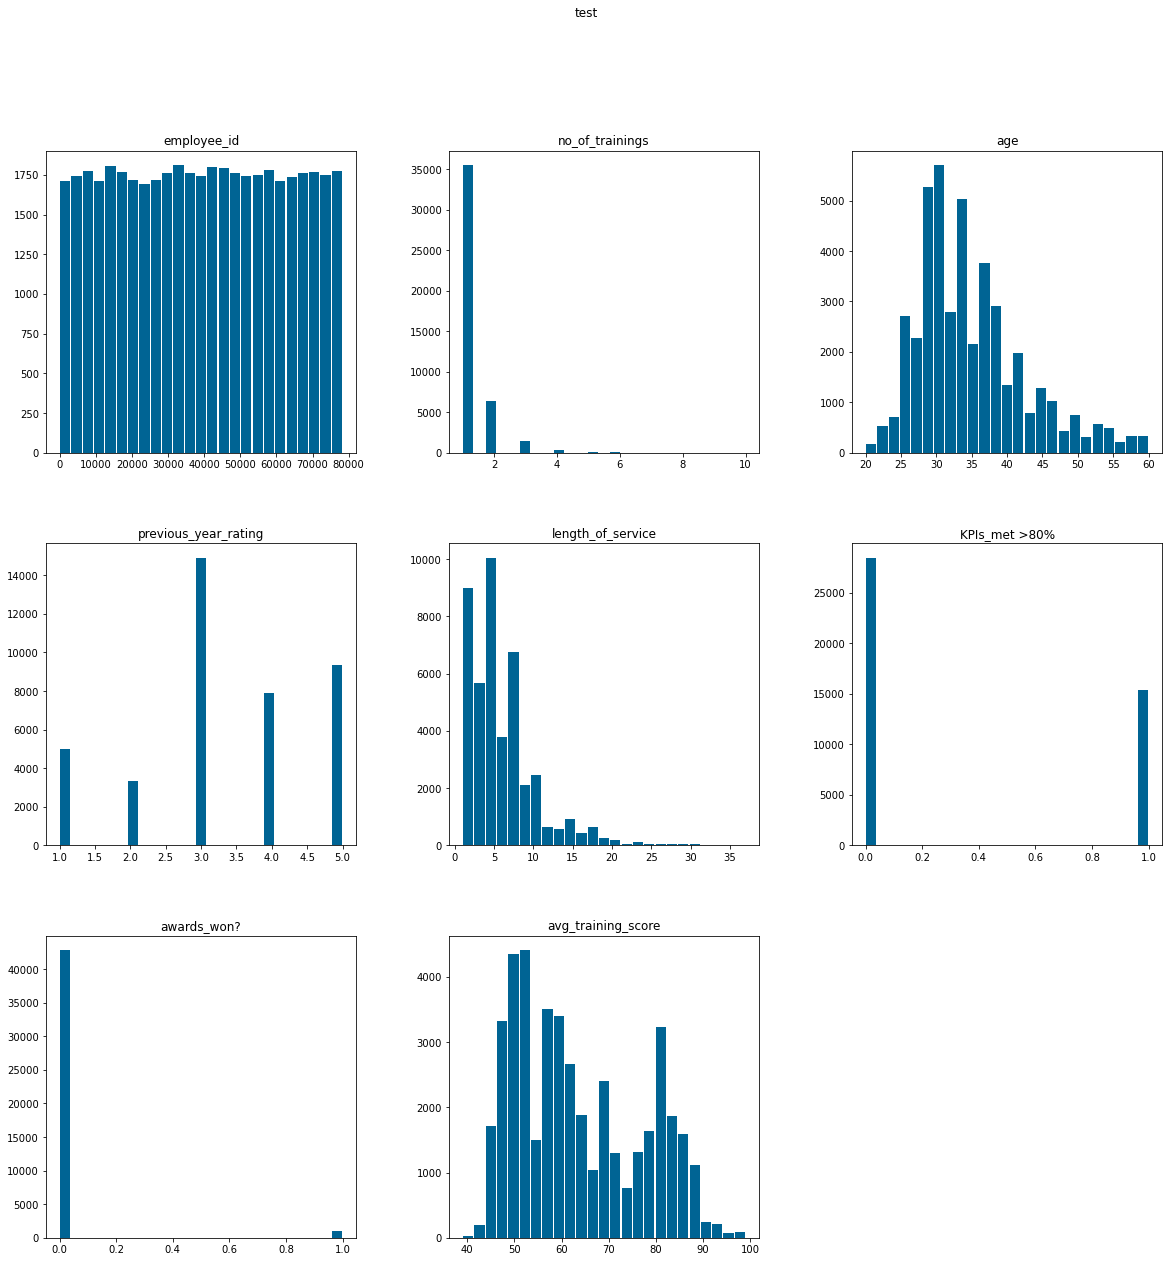

In [11]:
aa = x_train.hist(bins=25, grid=False, figsize=(20,20),color='#006494',zorder=2, rwidth=0.9)
plt.suptitle("test")

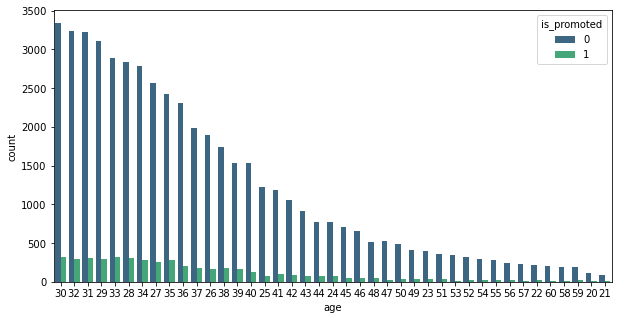

In [12]:
##### Compare Gender vs promote
plt.figure(figsize=(10,5))
ax = sns.countplot(x="age",data=df, palette="viridis",hue="is_promoted", order = df['age'].value_counts().index)

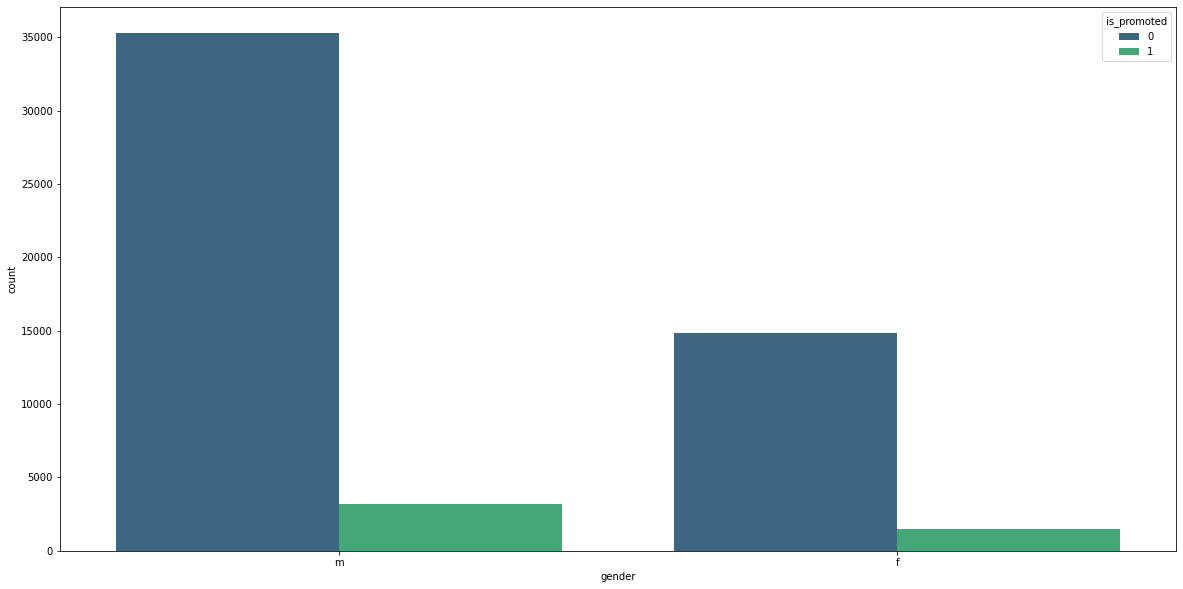

In [13]:
##### Compare Gender vs promote
plt.figure(figsize=(20,10))
x = sns.countplot(x="gender",data=df, palette="viridis",hue="is_promoted", order = df['gender'].value_counts().index)

#### Value Count

In [14]:
### Value Count
df.is_promoted.value_counts(normalize=True)


0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

#### One hot encoder

In [15]:
#onehotencoder -> cat features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
ohe_arr = ohe.fit_transform(df[['gender','department']]).toarray()
ohe_labels = ohe.get_feature_names(['gender','department'])
ohe_df = pd.DataFrame(ohe_arr, columns= ohe_labels)
ohe_df.head()

pd.concat([df,ohe_df],axis=1)



,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,gender_m,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
